In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
data0910 = pd.read_csv("dataset/data0910.csv")
data1011 = pd.read_csv("dataset/data1011.csv")

In [3]:
data = pd.concat([data0910, data1011], axis=0)

In [4]:
data = data.drop_duplicates()

In [5]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1033036 non-null  object 
 1   StockCode    1033036 non-null  object 
 2   Description  1028761 non-null  object 
 3   Quantity     1033036 non-null  int64  
 4   InvoiceDate  1033036 non-null  object 
 5   Price        1033036 non-null  float64
 6   Customer ID  797885 non-null   float64
 7   Country      1033036 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ MB


In [7]:
data = data.dropna()

In [8]:
data['date'] = data['InvoiceDate'].apply(lambda x : x.split()[0])
data['time'] = data['InvoiceDate'].apply(lambda x : x.split()[1])

data['hour'] = data['time'].apply(lambda x : x.split(':')[0])

data['date'] = data['date'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y'))
data['year'] = data['date'].apply(lambda x : x.year)
data['month'] = data['date'].apply(lambda x : x.month)
data['day'] = data['date'].apply(lambda x : x.day)
data ['quarter'] = data['date'].apply(lambda x : x.quarter)
data['weekday'] = data['date'].apply(lambda x : x.day_name())

data['total_price'] = data['Quantity'] * data['Price']

In [9]:
data.describe()

,Quantity,Price,Customer ID,year,month,day,quarter,total_price
count,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777,2010.431108,7.411434,15.387388,2.795019,20.416465
std,191.670371,71.392549,1696.466663,0.568904,3.424495,8.658264,1.132430,313.518824
min,-80995.000000,0.000000,12346.000000,2009.000000,1.000000,1.000000,1.000000,-168469.600000
25%,2.000000,1.250000,13964.000000,2010.000000,5.000000,8.000000,2.000000,4.350000
50%,5.000000,1.950000,15228.000000,2010.000000,8.000000,15.000000,3.000000,11.700000
75%,12.000000,3.750000,16788.000000,2011.000000,10.000000,23.000000,4.000000,19.500000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,31.000000,4.000000,168469.600000


### Quantity -1 인 이유 
    - 취소된 상품
    - 취소되면 'InvoiceNo'에 C가 붙게됨

In [10]:
tmp = data[data['Quantity'] < 0]

In [11]:
tmp[tmp['Invoice'].str.find("C") == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia,2009-12-01,10:33,10,2009,12,1,4,Tuesday,-35.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,2011-12-09,9:57,9,2011,12,9,4,Friday,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,2011-12-09,10:28,10,2011,12,9,4,Friday,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,2011-12-09,11:57,11,2011,12,9,4,Friday,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,2011-12-09,11:58,11,2011,12,9,4,Friday,-1.25


In [12]:
data = data[~data["Invoice"].str.contains("C")]
data = data[data["Quantity"] > 0]

### StockCode의 규칙
 - 문자로 이루어진 stockcode는 description도 통일되어 있음

In [13]:
# 문자로만
stockcode = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
stockcode['StockCode'].value_counts()

POST            1803
M                688
C2               248
ADJUST            32
BANK CHARGES      31
PADS              18
DOT               16
TEST001           11
D                  5
ADJUST2            3
SP1002             2
TEST002            1
Name: StockCode, dtype: int64

In [14]:
# stockcode 문자 dropna : 상품에 대한 것이 아니기 때문
data = data[~data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]

array([[<AxesSubplot:xlabel='Quantity', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Price', ylabel='Quantity'>,
        <AxesSubplot:xlabel='Customer ID', ylabel='Quantity'>,
        <AxesSubplot:xlabel='year', ylabel='Quantity'>,
        <AxesSubplot:xlabel='month', ylabel='Quantity'>,
        <AxesSubplot:xlabel='day', ylabel='Quantity'>,
        <AxesSubplot:xlabel='quarter', ylabel='Quantity'>,
        <AxesSubplot:xlabel='total_price', ylabel='Quantity'>],
       [<AxesSubplot:xlabel='Quantity', ylabel='Price'>,
        <AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Customer ID', ylabel='Price'>,
        <AxesSubplot:xlabel='year', ylabel='Price'>,
        <AxesSubplot:xlabel='month', ylabel='Price'>,
        <AxesSubplot:xlabel='day', ylabel='Price'>,
        <AxesSubplot:xlabel='quarter', ylabel='Price'>,
        <AxesSubplot:xlabel='total_price', ylabel='Price'>],
       [<AxesSubplot:xlabel='Quantity', ylabel='Customer ID'>,
        <AxesSubplo

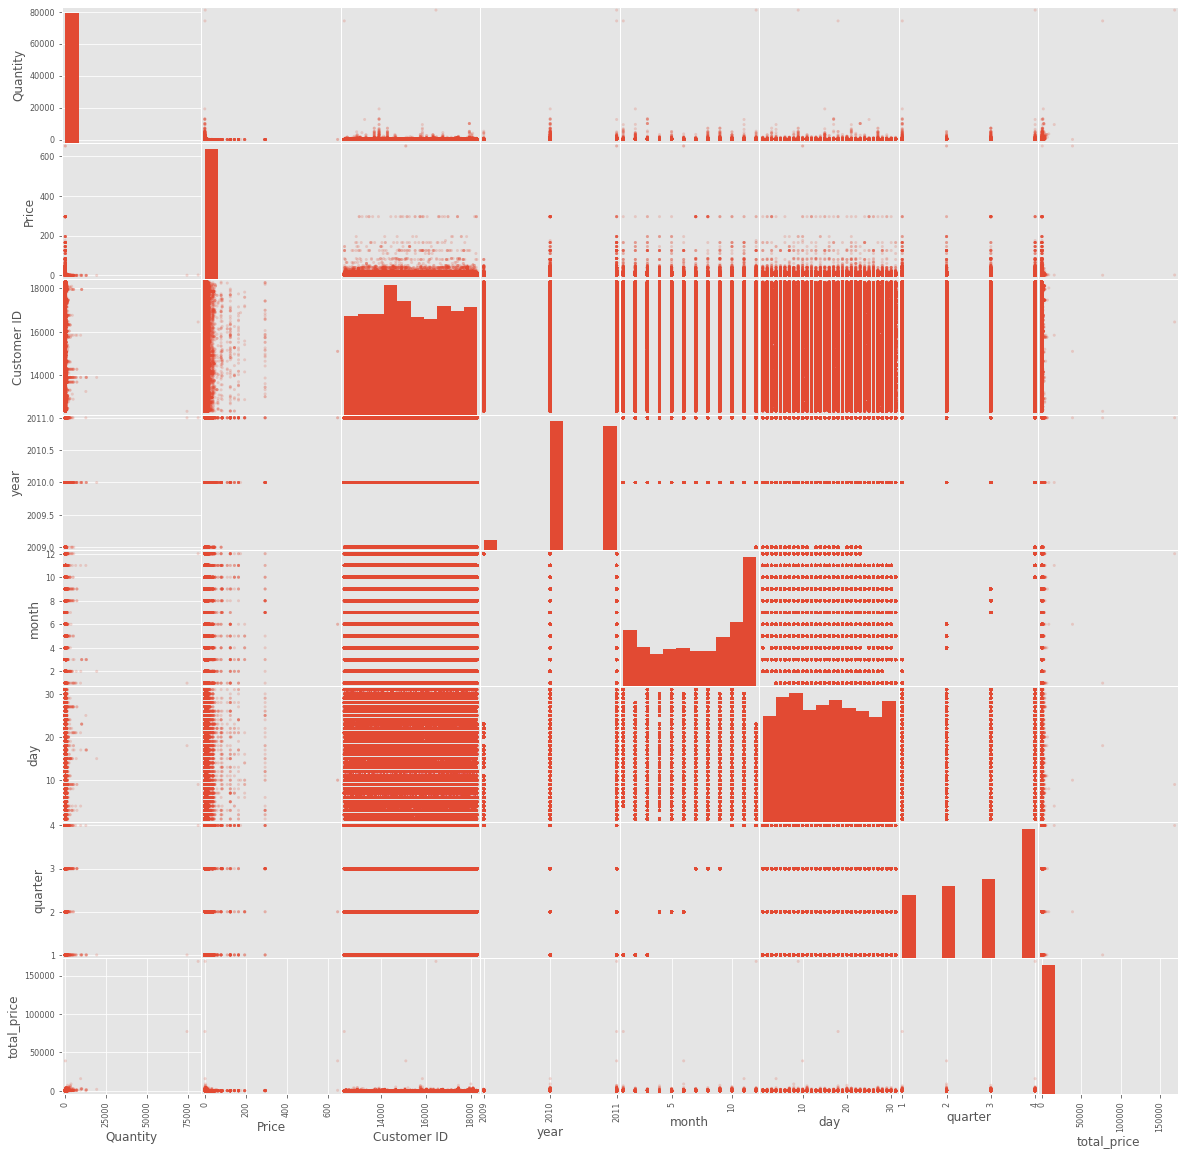

In [15]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(20, 20))

### revenue

In [16]:
# # 2011년 12월 데이터 삭제 : 전체 달의 데이터가 다 있는게 아니라 9일까지만 있음
# data = data[~((data['year'] == 2011) & (data['month'] == 12))] 

In [17]:
data = data.astype({'year':"string",
                         'quarter' : "string",
                         'month':"string",
                         'day':'string'})

- ARPPU(Average Revenue Per Paying User)
    - ARPPU = total revenue / user

In [18]:
total_revenue = data['total_price'].sum()
total_revenue

17068567.970000006

In [19]:
user = data['Customer ID'].nunique()
user

5853

In [20]:
ARPPU = total_revenue / user
ARPPU

2916.208434990604

- Year ARPPU(Average Revenue Per Paying User)

In [21]:
YARPPU = data.groupby(['year']).sum()['total_price'] / data.groupby(['year']).nunique()['Customer ID']
YARPPU_df = YARPPU.to_frame().reset_index().rename(columns={0 : 'YARPPU'})
YARPPU_df

,year,YARPPU
0,2009,712.845499
1,2010,1954.488423
2,2011,1938.796698


<AxesSubplot:xlabel='year', ylabel='YARPPU'>

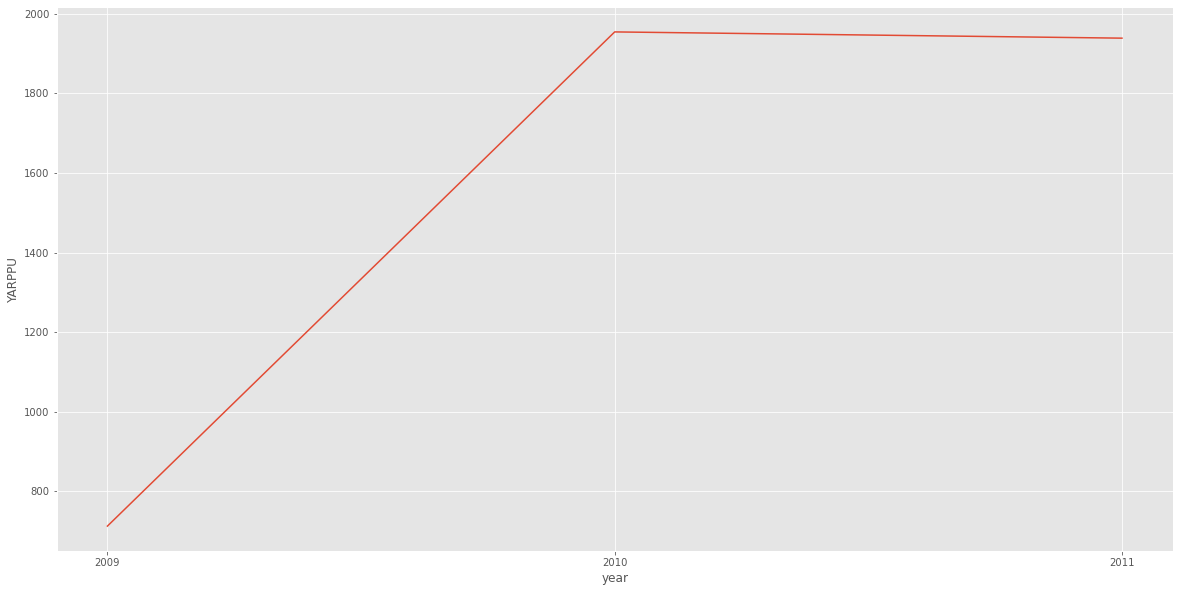

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(x=YARPPU_df['year'], y=YARPPU_df['YARPPU'])

- Quater ARPPU(Average Revenue Per Paying User)

In [23]:
QARPPU = data.groupby(['year', 'quarter']).sum()['total_price'] / data.groupby(['year','quarter']).nunique()['Customer ID']
QARPPU_df = QARPPU.to_frame().reset_index().rename(columns={0 : 'QARPPU'})
QARPPU_df

,year,quarter,QARPPU
0,2009,4,712.845499
1,2010,1,952.116781
2,2010,2,885.623020
3,2010,3,966.159893
4,2010,4,1025.416398
5,2011,1,895.220039
6,2011,2,888.806987
7,2011,3,1005.044455
8,2011,4,1035.581500


<AxesSubplot:xlabel='quarter', ylabel='QARPPU'>

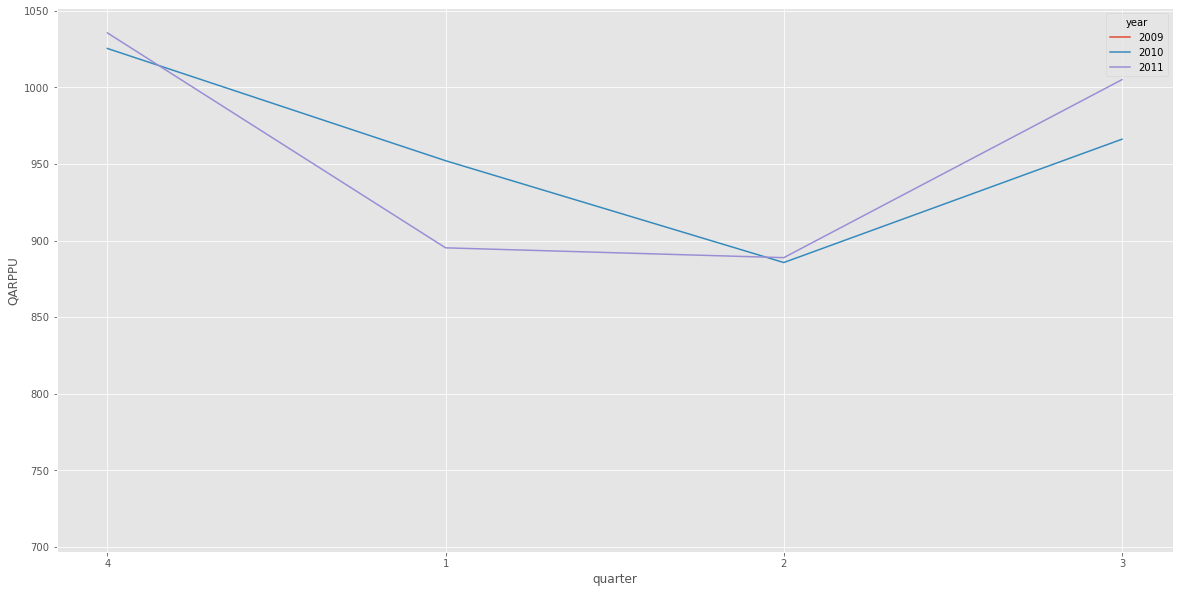

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x=QARPPU_df['quarter'], y=QARPPU_df['QARPPU'], hue=QARPPU_df['year'])

- Monthly ARPPU(Average Revenue Per Paying User)

In [25]:
data = data.astype({'year':"int",
                         'month':"int",
                         'day':'int'})

In [26]:
MARPPU = data.groupby(['year','month']).sum()['total_price'] / data.groupby(['year','month']).nunique()['Customer ID']
MARPPU_df = MARPPU.to_frame().reset_index().rename(columns={0 : 'MARPPU'})
MARPPU_df

,year,month,MARPPU
0,2009,12,712.845499
1,2010,1,761.359458
2,2010,2,645.833424
3,2010,3,633.657155
4,2010,4,623.138903
5,2010,5,614.232259
6,2010,6,608.132882
7,2010,7,629.315974
8,2010,8,653.363923
9,2010,9,709.106347


<AxesSubplot:xlabel='month', ylabel='MARPPU'>

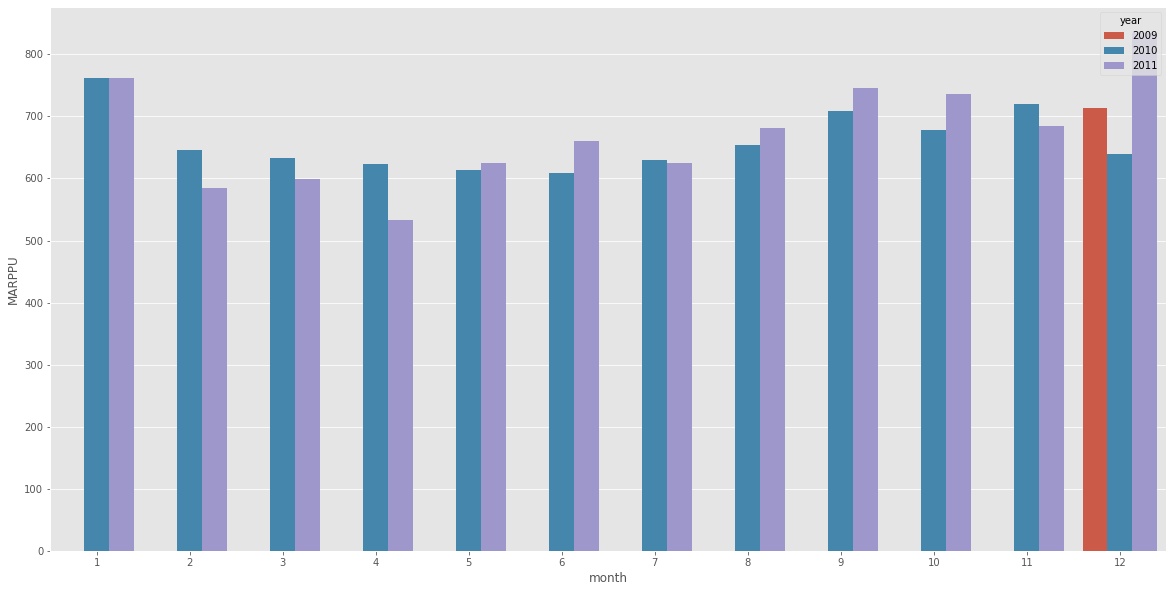

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=MARPPU_df['month'], y=MARPPU_df['MARPPU'], hue=MARPPU_df['year'])

- Daily ARPPU(Average Revenue Per Paying User)

In [28]:
DARPPU = data.groupby(['year','month', 'day']).sum()['total_price'] / data.groupby(['year','month', 'day']).nunique()['Customer ID']
DARPPU_df = DARPPU.to_frame().reset_index().rename(columns={0 : 'DARPU'})

<AxesSubplot:xlabel='day', ylabel='DARPU'>

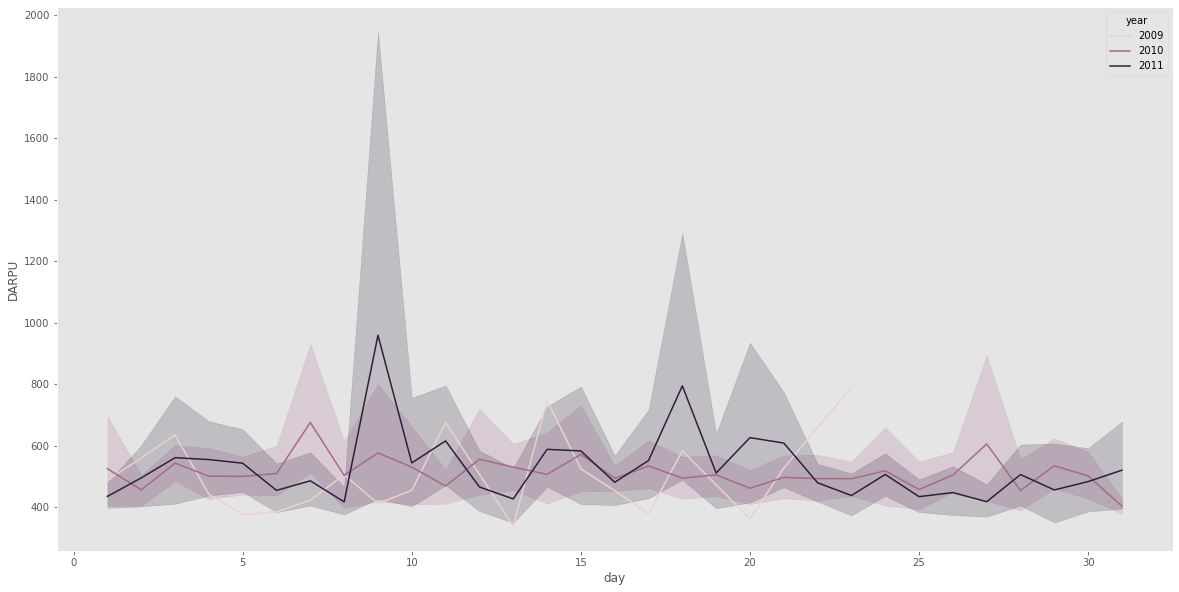

In [29]:
plt.figure(figsize=(20,10))
plt.grid()
sns.lineplot(x=DARPPU_df['day'], y=DARPPU_df['DARPU'], hue=DARPPU_df['year'])

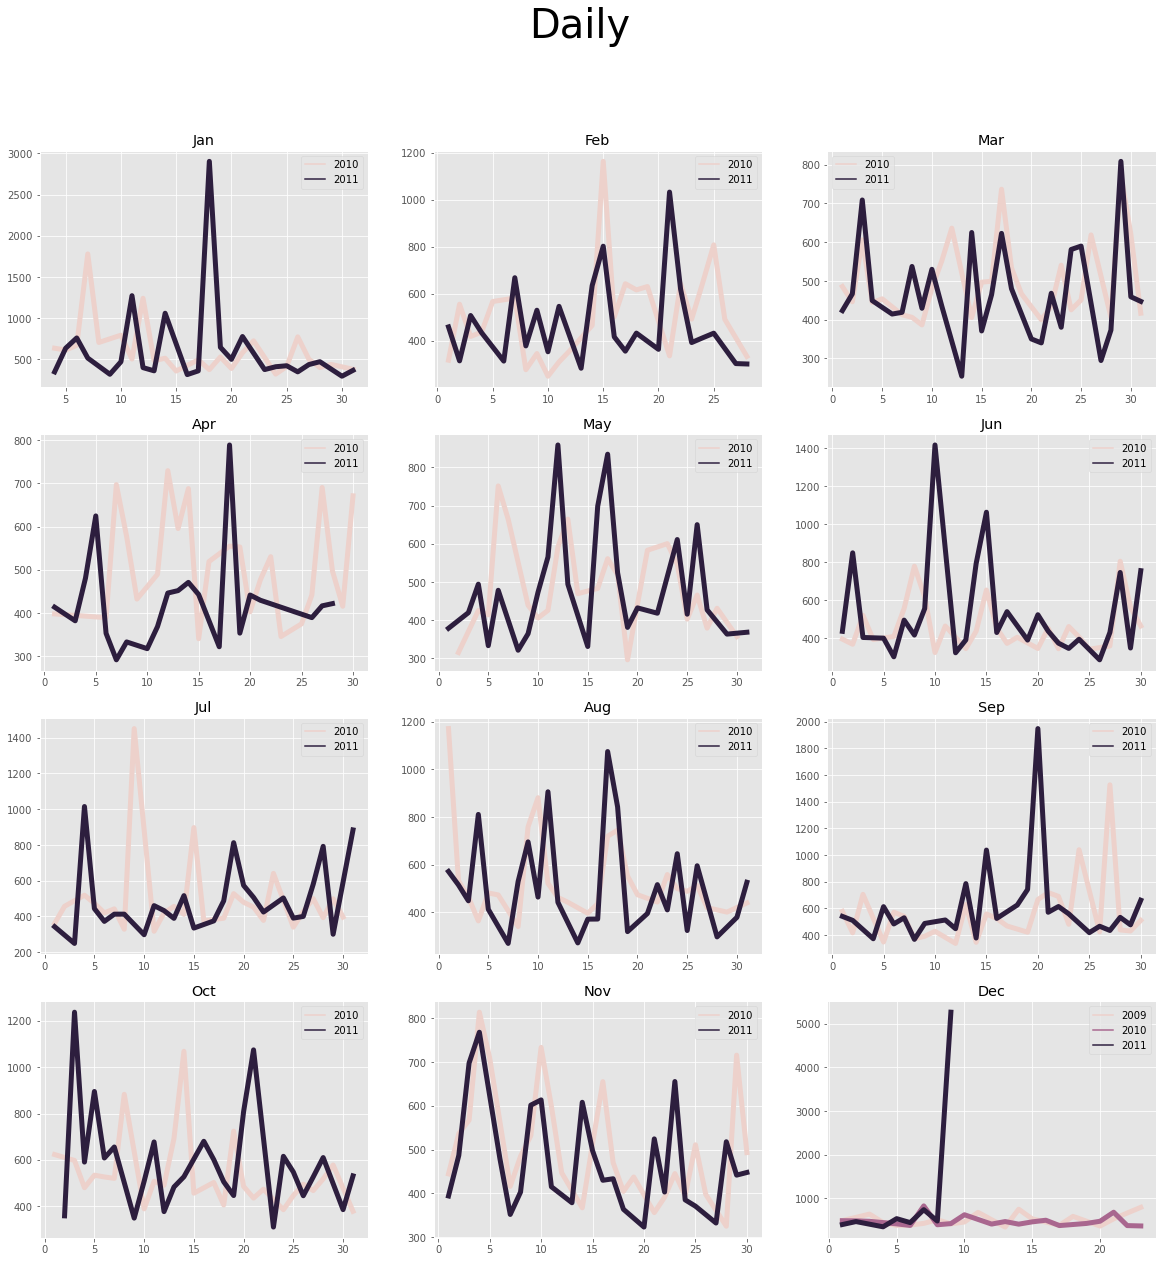

In [30]:
plt.style.use('ggplot')
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Daily', fontsize=40)

column_idx = 1
var_list = ["","Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i in range(4):
    for j in range(3):
        df = DARPPU_df[DARPPU_df['month'] == column_idx]
        sns.lineplot(x=df['day'], y=df['DARPU'], hue=df['year'], linewidth=5, ax = ax[i][j])
        ax[i][j].set_xlabel('')
        ax[i][j].set_ylabel('')
        ax[i][j].set_title(var_list[column_idx])
        ax[i][j].legend()
        column_idx += 1
plt.show();
# plt.savefig('image1.png', facecolor='white')

- ASP(Average Selling Price)

In [31]:
ASP = data.groupby(['year','month']).sum()['total_price'] / data.groupby(['year','month']).sum()['Quantity']
ASP_df = ASP.to_frame().reset_index().rename(columns={0 : 'ASP'})
ASP_df

,year,month,ASP
0,2009,12,1.701016
1,2010,1,1.442776
2,2010,2,1.339774
3,2010,3,1.328517
4,2010,4,1.671568
5,2010,5,1.541146
6,2010,6,1.614833
7,2010,7,1.792392
8,2010,8,1.314886
9,2010,9,1.419730


<AxesSubplot:xlabel='month', ylabel='ASP'>

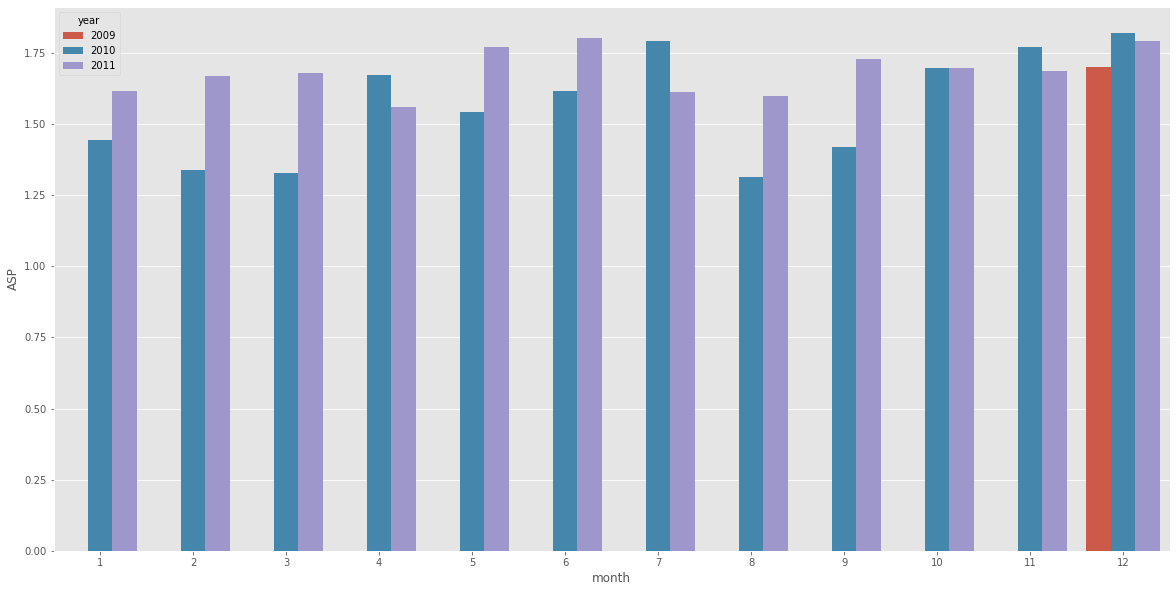

In [32]:
plt.figure(figsize=(20,10))
sns.barplot(x=ASP_df['month'], y=ASP_df['ASP'], hue=ASP_df['year'])

- RFM analysis
    - Recency (affects retention, a measure of engagement)
    - Frequency (affects a customer’s lifetime value)
    - Monetary (affects a customer’s lifetime value)

In [33]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,time,hour,year,month,day,quarter,weekday,total_price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,2009-12-01,7:45,7,2009,12,1,4,Tuesday,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,12:50,12,2011,12,9,4,Friday,16.60


In [48]:
# 기준 날짜 : 2011년 12월 10일
date = dt.datetime(2011, 12, 10)
RFM = data.groupby('Customer ID').agg({'InvoiceDate' : lambda invoicedate : (date - data['date'].max()).days,
                                   'Invoice' : lambda x : x.nunique(),
                                   'total_price' : lambda x : x.sum()}) 

KeyboardInterrupt: 

In [69]:
data.groupby('Customer ID').agg({'InvoiceDate' : lambda invoicedate : (date - data['date'].max()).days,})

,InvoiceDate
Customer ID,
12346.0,1
12347.0,1
12348.0,1
12349.0,1
12350.0,1
...,...
18283.0,1
18284.0,1
18285.0,1


In [77]:
a = date - data[data['Customer ID'] == 12346.0]['date'].max()

In [78]:
a.days

326

In [73]:
data[data['Customer ID'] == 12346.0]['date'].max()

Timestamp('2011-01-18 00:00:00')

In [ ]:
data.groupby('Customer ID').agg({'Invoice' : lambda invoice : data['Invoice'].nunique()})

In [68]:
date - data.groupby('Customer ID')['date'].max()

Customer ID
12346.0   326 days
12347.0     3 days
12348.0    76 days
12349.0    19 days
12350.0   311 days
            ...   
18283.0     4 days
18284.0   432 days
18285.0   661 days
18286.0   477 days
18287.0    43 days
Name: date, Length: 5853, dtype: timedelta64[ns]

In [65]:
data.groupby('Customer ID').nunique()['Invoice']

Customer ID
12346.0     3
12347.0     8
12348.0     5
12349.0     3
12350.0     1
           ..
18283.0    22
18284.0     1
18285.0     1
18286.0     2
18287.0     7
Name: Invoice, Length: 5853, dtype: int64